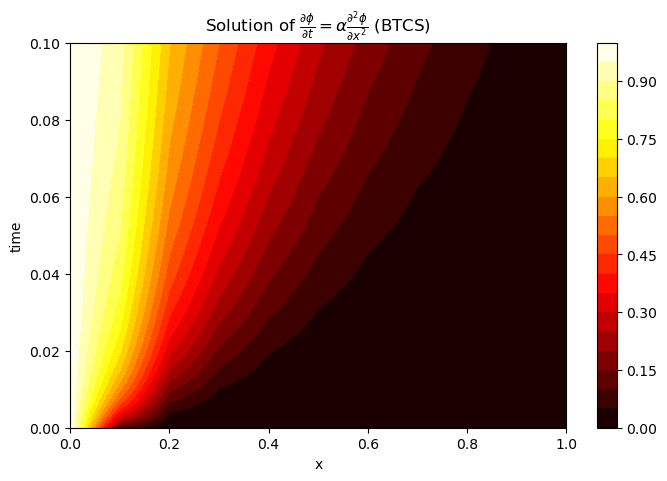

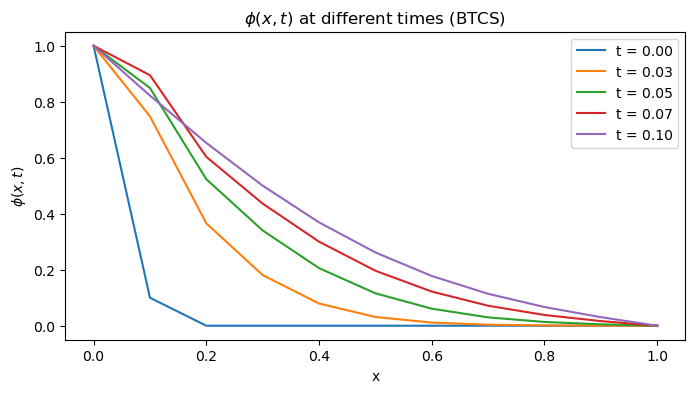

In [2]:
#BBTCS


import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import diags, csc_matrix
from scipy.sparse.linalg import spsolve


alpha = 1  
N = 10     
Nt = 100   
L = 1      
T = 0.1      

h = L / N  #
k = T / Nt 
r = alpha * k / (h ** 2)

x = np.linspace(0, L, N+1)
time_steps = Nt
time = np.linspace(0, T, time_steps+1)

phi = np.zeros((N+1, time_steps+1))


phi[0, :] = 1
phi[N, :] = 0


diagonals = [[-r] * (N-2), [1 + 2 * r] * (N-1), [-r] * (N-2)]
A = diags(diagonals, [-1, 0, 1], shape=(N-1, N-1)).tocsc()  


for n in range(0, time_steps):
    b = phi[1:N, n]  
    b[0] += r * phi[0, n] 
    b[-1] += r * phi[N, n]  
    phi[1:N, n+1] = spsolve(A, b)


X, T = np.meshgrid(x, time)

fig = plt.figure(figsize=(8, 5))
plt.contourf(X, T, phi.T, 20, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('time')
plt.title(r'Solution of $\frac{\partial \phi}{\partial t} = \alpha \frac{\partial^2 \phi}{\partial x^2}$ (BTCS)')
plt.show()


fig = plt.figure(figsize=(8, 4))
for n in [0, int(0.25*Nt), int(0.5*Nt), int(0.75*Nt), Nt]:
    plt.plot(x, phi[:, n], label=f't = {time[n]:.2f}')
plt.xlabel('x')
plt.ylabel(r'$\phi(x,t)$')
plt.title(r'$\phi(x,t)$ at different times (BTCS)')
plt.legend()
plt.show()


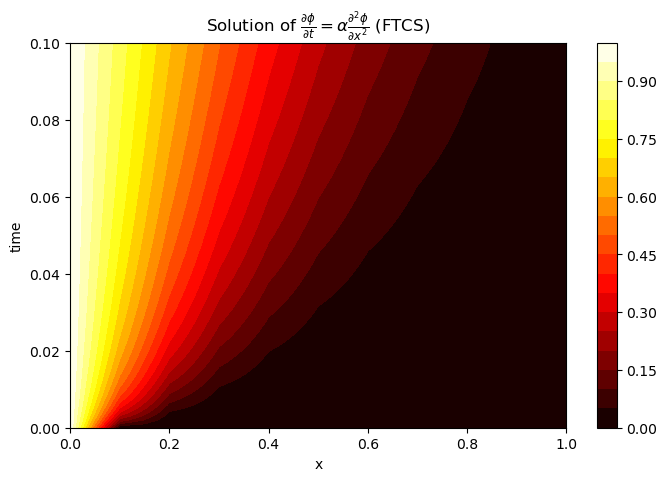

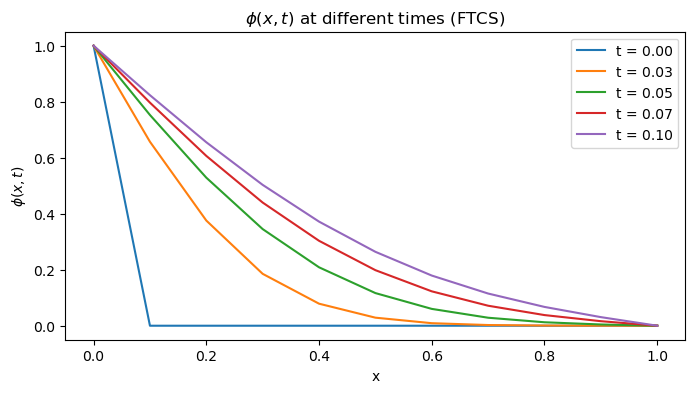

In [22]:
#FTCS


import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


alpha =1  
N = 10     
Nt = 100   
L = 1     
T = 0.1     

h = L / N 
k = T / Nt 
r = alpha * k / (h ** 2)

if r > 0.5:
    raise ValueError(f"Unstable configuration: r = {r}. Adjust time step or spatial step.")

x = np.linspace(0, L, N+1)
time_steps = Nt
time = np.linspace(0, T, time_steps+1)


phi = np.zeros((N+1, time_steps+1))


phi[0, :] = 1
phi[N, :] = 0


for n in range(0, time_steps):
    for i in range(1, N):  
        phi[i, n+1] = phi[i, n] + r * (phi[i+1, n] - 2 * phi[i, n] + phi[i-1, n])


X, T = np.meshgrid(x, time)

fig = plt.figure(figsize=(8, 5))
plt.contourf(X, T, phi.T, 20, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('time')
plt.title(r'Solution of $\frac{\partial \phi}{\partial t} = \alpha \frac{\partial^2 \phi}{\partial x^2}$ (FTCS)')
plt.show()


fig = plt.figure(figsize=(8, 4))
for n in [0, int(0.25*Nt), int(0.5*Nt), int(0.75*Nt), Nt]:
    plt.plot(x, phi[:, n], label=f't = {time[n]:.2f}')
plt.xlabel('x')
plt.ylabel(r'$\phi(x,t)$')
plt.title(r'$\phi(x,t)$ at different times (FTCS)')
plt.legend()
plt.show()


تمرین سری دوم دینامیک سیالات محاسباتی

برای معادله حرارت پیاده سازی شده است FTCS,BTCS در این تمرین روش های عددی 




https://github.com/mohamadrah/CFD-

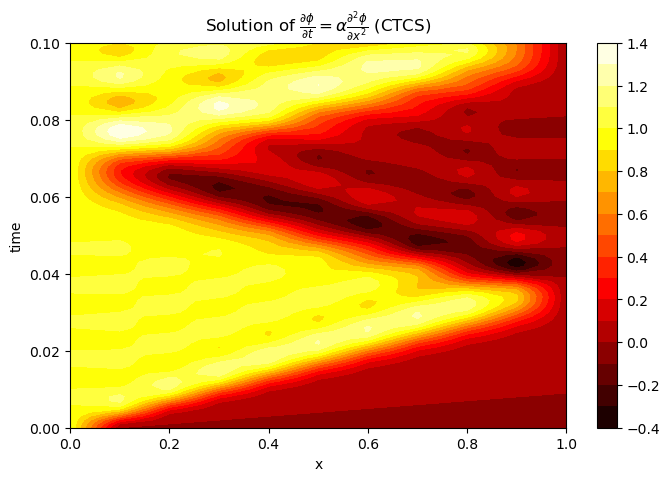

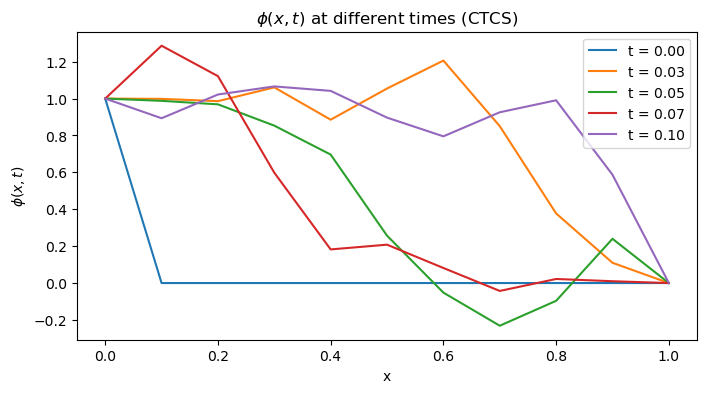

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


alpha = 1      
N = 10      
Nt = 100       
L = 1        
T = 0.1        

h = L / N      
k = T / Nt     
r = alpha * k / (h ** 2)

x = np.linspace(0, L, N+1)
time_steps = Nt
time = np.linspace(0, T, time_steps+1)

phi = np.zeros((N+1, time_steps+1))


phi[0, :] = 1
phi[N, :] = 0


phi[:, 0] = 0  
phi[0, 0] = 1  
phi[N, 0] = 0  


for i in range(1, N):
    phi[i, 1] = phi[i, 0] + r * (phi[i+1, 0] - 2 * phi[i, 0] + phi[i-1, 0])


for n in range(1, time_steps):
    for i in range(1, N):
        phi[i, n+1] = (
            2 * (1 - r) * phi[i, n]
            + r * (phi[i+1, n] + phi[i-1, n])
            - phi[i, n-1]
        )


X, T = np.meshgrid(x, time)

fig = plt.figure(figsize=(8, 5))
plt.contourf(X, T, phi.T, 20, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('time')
plt.title(r'Solution of $\frac{\partial \phi}{\partial t} = \alpha \frac{\partial^2 \phi}{\partial x^2}$ (CTCS)')
plt.show()


fig = plt.figure(figsize=(8, 4))
for n in [0, int(0.25*Nt), int(0.5*Nt), int(0.75*Nt), Nt]:
    plt.plot(x, phi[:, n], label=f't = {time[n]:.2f}')
plt.xlabel('x')
plt.ylabel(r'$\phi(x,t)$')
plt.title(r'$\phi(x,t)$ at different times (CTCS)')
plt.legend()
plt.show()


در نمودار ها مشهود است central time central spase(CTCS) عدم پایداری روش

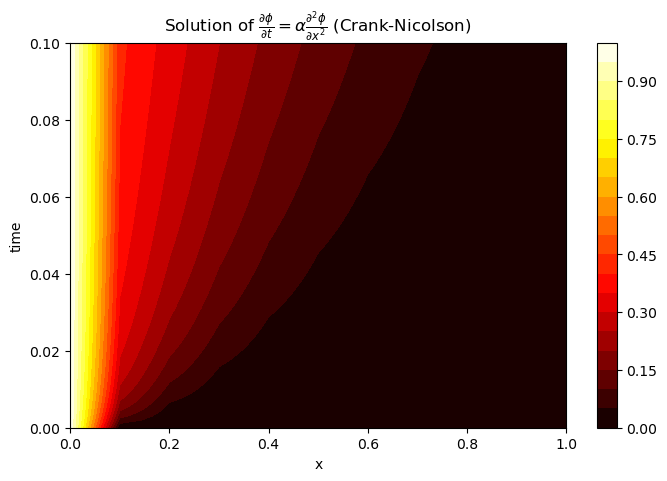

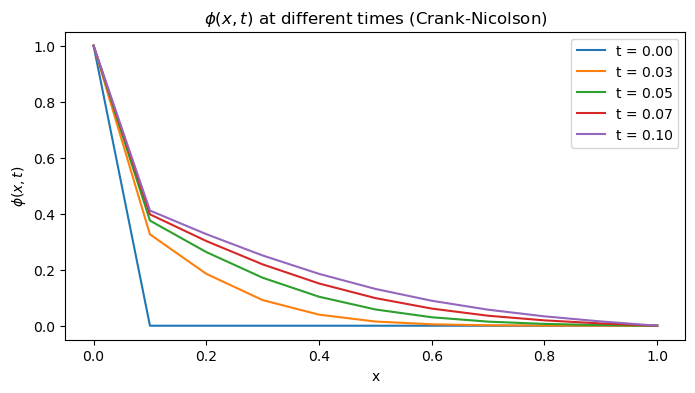

In [4]:
# Crank-nicolsone

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import diags, csc_matrix
from scipy.sparse.linalg import spsolve


alpha = 1      
N = 10        
Nt = 100       
L = 1        
T = 0.1        

h = L / N    
k = T / Nt    
r = alpha * k / (2 * h ** 2)

x = np.linspace(0, L, N+1)
time_steps = Nt
time = np.linspace(0, T, time_steps+1)


phi = np.zeros((N+1, time_steps+1))
 
phi[0, :] = 1
phi[N, :] = 0

diagonals_A = [[-r] * (N-1), [1 + 2 * r] * (N), [-r] * (N-1)]
A = diags(diagonals_A, [-1, 0, 1], shape=(N-1, N-1)).tocsc()

diagonals_B = [[r] * (N-1), [1 - 2 * r] * (N), [r] * (N-1)]
B = diags(diagonals_B, [-1, 0, 1], shape=(N-1, N-1)).tocsc()


for n in range(0, time_steps):
   
    b = B @ phi[1:N, n]
    b[0] += r * phi[0, n] 
    b[-1] += r * phi[N, n] 
    phi[1:N, n+1] = spsolve(A, b)


X, T = np.meshgrid(x, time)

fig = plt.figure(figsize=(8, 5))
plt.contourf(X, T, phi.T, 20, cmap='hot')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('time')
plt.title(r'Solution of $\frac{\partial \phi}{\partial t} = \alpha \frac{\partial^2 \phi}{\partial x^2}$ (Crank-Nicolson)')
plt.show()

fig = plt.figure(figsize=(8, 4))
for n in [0, int(0.25*Nt), int(0.5*Nt), int(0.75*Nt), Nt]:
    plt.plot(x, phi[:, n], label=f't = {time[n]:.2f}')
plt.xlabel('x')
plt.ylabel(r'$\phi(x,t)$')
plt.title(r'$\phi(x,t)$ at different times (Crank-Nicolson)')
plt.legend()
plt.show()


در این تمرین روش های مختلف برای معادله هدایت یک بعدی گذرا پیاده سازی شده است 


https://github.com/mohamadrah/CFD-